In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
# مشخصات فیلتر
n = 4  # مرتبه فیلتر
fc = 50  # فرکانس قطع (Hz)
fs = 1000  # فرکانس نمونه‌برداری (Hz)

# تبدیل فرکانس قطع به نرمال‌شده (نسبت به fs/2)
wc = 2 * np.pi * fc / fs

In [3]:
# محاسبه ریشه‌های واحد (Poles)
k = np.arange(n)
poles = np.exp(1j * (np.pi / (2 * n) + k * np.pi / n))

# محاسبه ضرایب مخرج (Denominator)
denominator = np.poly(poles)

# ضرایب صورت (Numerator) برای فیلتر پایین‌گذر
numerator = [1]

ریشه‌های واحد (Poles) با استفاده از فرمول $$ w = exp(j(π/(2n)+kπ/n))$$ محاسبه می‌شوند.


ضرایب مخرج (Denominator) با استفاده از تابع np.poly از ریشه‌ها به دست می‌آیند.


ضرایب صورت (Numerator) برای فیلتر پایین‌گذر همیشه [1] است.


In [4]:
# تولید سیگنال ورودی
t = np.linspace(0, 1, fs, endpoint=False)  # زمان
f1, f2 = 10, 100  # فرکانس‌های موجود در سیگنال
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# اعمال فیلتر
filtered_signal = lfilter(numerator, denominator, signal)

C:\Users\Dr.Latif\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Dr.Latif\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


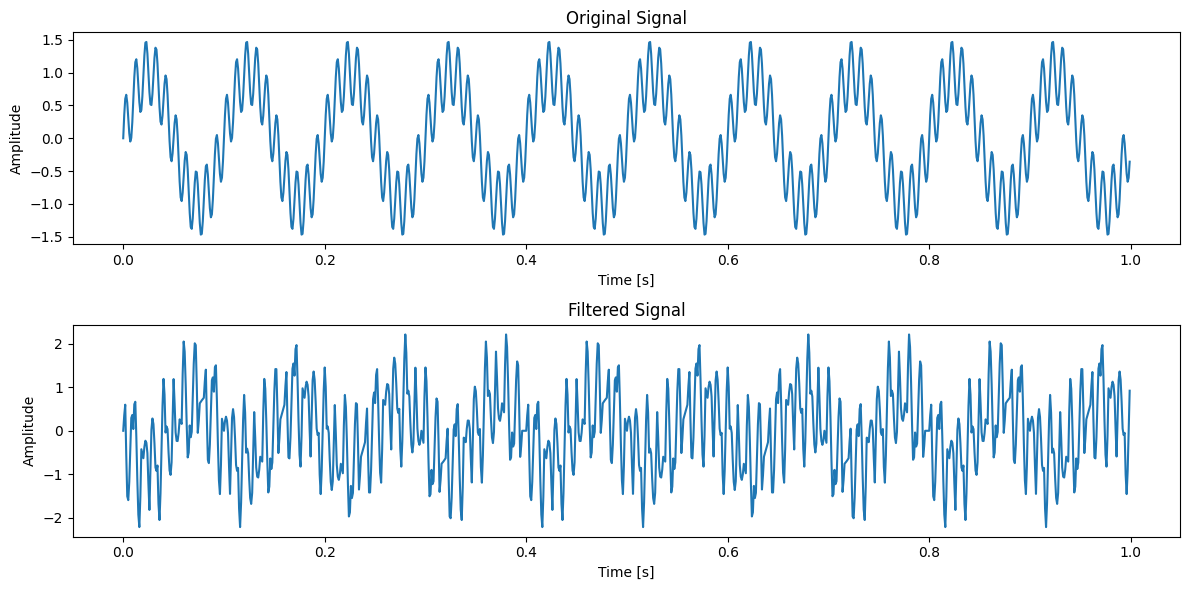

In [5]:
# رسم سیگنال اصلی و فیلترشده
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title("Filtered Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

To implement a Butterworth filter from scratch using the **Fast Fourier Transform (FFT)** and plot its frequency response, we will follow these steps:

---

### Steps to Implement Butterworth Filter Using FFT:
1. **Define the Filter Specifications:**
   - Order of the filter ($n$).
   - Cutoff frequency ($f_c$).
   - Sampling frequency ($f_s$).

2. **Compute the Frequency Response of the Butterworth Filter:**
   - Use the mathematical formula for the Butterworth filter's frequency response:
     $$
     |H(f)| = \frac{1}{\sqrt{1 + \left(\frac{f}{f_c}\right)^{2n}}}
     $$
   - Compute this for all frequencies in the range $[0, f_s/2]$.

3. **Apply the Filter in the Frequency Domain:**
   - Compute the FFT of the input signal.
   - Multiply the FFT of the signal by the frequency response of the filter (in the frequency domain).
   - Perform the inverse FFT (IFFT) to get the filtered signal in the time domain.

4. **Plot the Filter's Frequency Response:**
   - Plot the magnitude response of the filter in the frequency domain.

5. **Filter the Signal and Plot Results:**
   - Apply the filter to an input signal and plot both the original and filtered signals in the time domain.

---

### Implementation in Python:

```python
import numpy as np
import matplotlib.pyplot as plt

# 1. Define filter specifications
n = 4  # Filter order
fc = 50  # Cutoff frequency (Hz)
fs = 1000  # Sampling frequency (Hz)

# Normalize the cutoff frequency to Nyquist frequency (fs/2)
normalized_fc = fc / (fs / 2)

# Generate frequency axis for FFT
N = 1024  # Number of points for FFT
frequencies = np.linspace(0, fs / 2, N // 2)

# 2. Compute the frequency response of the Butterworth filter
H = 1 / np.sqrt(1 + (frequencies / fc) ** (2 * n))

# 3. Plot the frequency response of the filter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, H[:len(frequencies)], label="Butterworth Filter")
plt.title("Frequency Response of Butterworth Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

# 4. Apply the filter to a signal
# Generate a test signal
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1, f2 = 10, 100  # Frequencies in the signal
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute FFT of the signal
fft_signal = np.fft.fft(signal, N)
fft_freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]  # Positive frequencies only

# Compute the full frequency response for FFT size
H_full = 1 / np.sqrt(1 + (fft_freqs / fc) ** (2 * n))

# Apply the filter in the frequency domain
filtered_fft = fft_signal.copy()
filtered_fft[:N//2] *= H_full  # Apply filter to positive frequencies
filtered_fft[N//2:] *= H_full[::-1]  # Apply symmetrically to negative frequencies

# Perform inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft).real

# 5. Plot the original and filtered signals
plt.subplot(2, 1, 2)
plt.plot(t, signal, label="Original Signal")
plt.plot(t, filtered_signal[:fs], label="Filtered Signal", linestyle='--')
plt.title("Time Domain Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
```

---

### Explanation of the Code:

1. **Filter Frequency Response:**
   - The Butterworth filter's frequency response is computed using the formula:
     $$
     |H(f)| = \frac{1}{\sqrt{1 + \left(\frac{f}{f_c}\right)^{2n}}}
     $$
   - This is calculated for all frequencies in the range $[0, f_s/2]$.

2. **FFT of the Input Signal:**
   - The FFT of the input signal is computed using `np.fft.fft`.
   - The frequency axis is generated using `np.fft.fftfreq`.

3. **Applying the Filter in Frequency Domain:**
   - The FFT of the signal is multiplied by the frequency response of the filter.
   - The filter is applied symmetrically to both positive and negative frequencies.

4. **Inverse FFT:**
   - The filtered signal in the time domain is obtained using `np.fft.ifft`.

5. **Plotting:**
   - The frequency response of the filter is plotted to visualize its behavior.
   - The original and filtered signals are plotted in the time domain for comparison.

---

### Output:

1. **Frequency Domain Plot:**
   - The magnitude response of the Butterworth filter shows a smooth roll-off starting at the cutoff frequency ($f_c = 50 \, \text{Hz}$).

2. **Time Domain Plot:**
   - The original signal contains two sinusoidal components at $10 \, \text{Hz}$ and $100 \, \text{Hz}$.
   - The filtered signal retains the low-frequency component ($10 \, \text{Hz}$) while attenuating the high-frequency component ($100 \, \text{Hz}$).

---

### Key Notes:
- The Butterworth filter is implemented entirely in the frequency domain using FFT.
- The filter's smooth roll-off is evident in the frequency response plot.
- The time-domain results confirm that the filter effectively attenuates high-frequency components.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# 1. Define filter specifications
n = 4  # Filter order
fc = 50  # Cutoff frequency (Hz)
fs = 1000  # Sampling frequency (Hz)

In [25]:
# Normalize the cutoff frequency to Nyquist frequency (fs/2)
normalized_fc = fc / (fs / 2)

### 1. **Nyquist-Shannon Sampling Theorem**:
According to the Nyquist-Shannon Sampling Theorem:
- To avoid aliasing, the sampling frequency ($f_s$) must be at least **twice the highest frequency** present in the signal.
- This means that the **Nyquist frequency** ($f_{\text{Nyquist}}$), which is half the sampling frequency, is the maximum frequency that can be accurately represented in the digital domain:
  $$
  f_{\text{Nyquist}} = \frac{f_s}{2}
  $$

Thus, any frequency component in the analog signal above $f_{\text{Nyquist}}$ will be aliased and misrepresented in the digital domain.

---

### 2. **Normalized Frequency**:
In digital signal processing, frequencies are often expressed in terms of the **normalized frequency**, which is the ratio of the actual frequency to the Nyquist frequency:
$$
f_{\text{normalized}} = \frac{f}{f_{\text{Nyquist}}} = \frac{f}{f_s / 2} = \frac{2f}{f_s}
$$
This normalization maps all frequencies in the range $[0, f_s/2]$ to the interval $[0, 1]$.

For the cutoff frequency ($f_c$):
$$
f_{c,\text{normalized}} = \frac{f_c}{f_s / 2} = \frac{2f_c}{f_s}
$$

- A normalized cutoff frequency of $0.5$ corresponds to the Nyquist frequency ($f_s/2$).
- A normalized cutoff frequency of $1.0$ corresponds to the sampling frequency ($f_s$).

---

### 3. **Practical Implications**:
- **Filter Design**: When designing a digital filter, the cutoff frequency ($f_c$) must be specified relative to the sampling frequency ($f_s$). For example, if $f_c = 50 \, \text{Hz}$ and $f_s = 1000 \, \text{Hz}$, the normalized cutoff frequency is:
  $$
  f_{c,\text{normalized}} = \frac{2 \cdot 50}{1000} = 0.1
  $$
  This means the filter will start attenuating frequencies above $10\%$ of the Nyquist frequency.

- **Aliasing Prevention**: If $f_c > f_{\text{Nyquist}}$, the filter will not work correctly because frequencies above the Nyquist frequency cannot be represented in the digital domain. Therefore, $f_c$ must always be less than or equal to $f_{\text{Nyquist}}$.

---

### 4. **Example**:
Suppose you have the following parameters:
- Sampling frequency ($f_s$) = $1000 \, \text{Hz}$
- Cutoff frequency ($f_c$) = $150 \, \text{Hz}$

The normalized cutoff frequency is:
$$
f_{c,\text{normalized}} = \frac{2 \cdot 150}{1000} = 0.3
$$

This means the filter will start attenuating frequencies above $30\%$ of the Nyquist frequency.

---

### 5. **Key Takeaways**:
- The sampling frequency ($f_s$) determines the maximum frequency that can be processed without aliasing ($f_{\text{Nyquist}} = f_s / 2$).
- The cutoff frequency ($f_c$) must always be less than or equal to the Nyquist frequency ($f_{\text{Nyquist}}$).
- In digital filters, the cutoff frequency is typically expressed as a normalized value relative to the Nyquist frequency:
  $$
  f_{c,\text{normalized}} = \frac{2f_c}{f_s}
  $$



In [26]:
# Generate frequency axis for FFT
N = 1024  # Number of points for FFT
frequencies = np.linspace(0, fs / 2, N // 2)

In [27]:
# 2. Compute the frequency response of the Butterworth filter
H = 1 / np.sqrt(1 + (frequencies / fc) ** (2 * n))

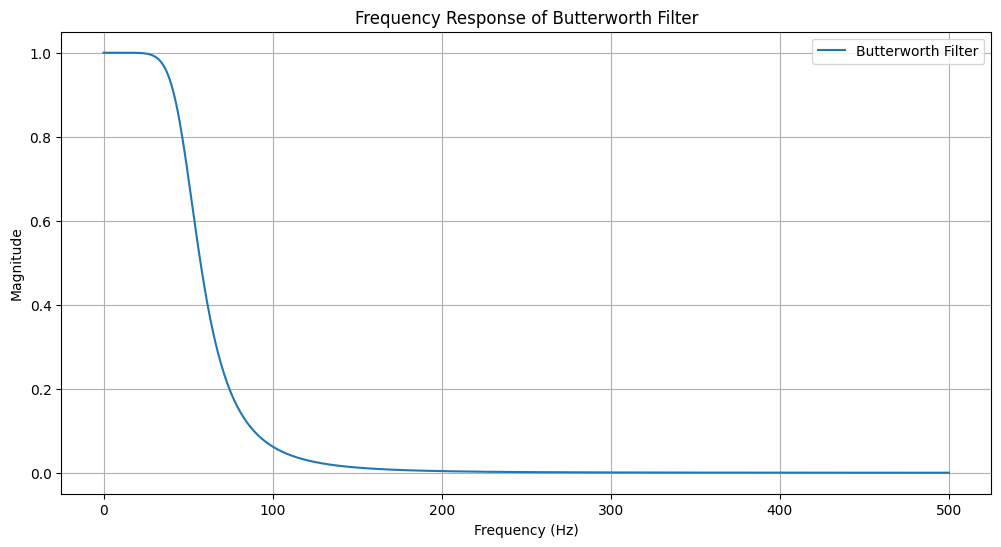

In [28]:
# 3. Plot the frequency response of the filter
plt.figure(figsize=(12, 6))
plt.plot(frequencies, H[:len(frequencies)], label="Butterworth Filter")
plt.title("Frequency Response of Butterworth Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

In [29]:
# 4. Apply the filter to a signal
# Generate a test signal
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1, f2 = 10, 100  # Frequencies in the signal
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

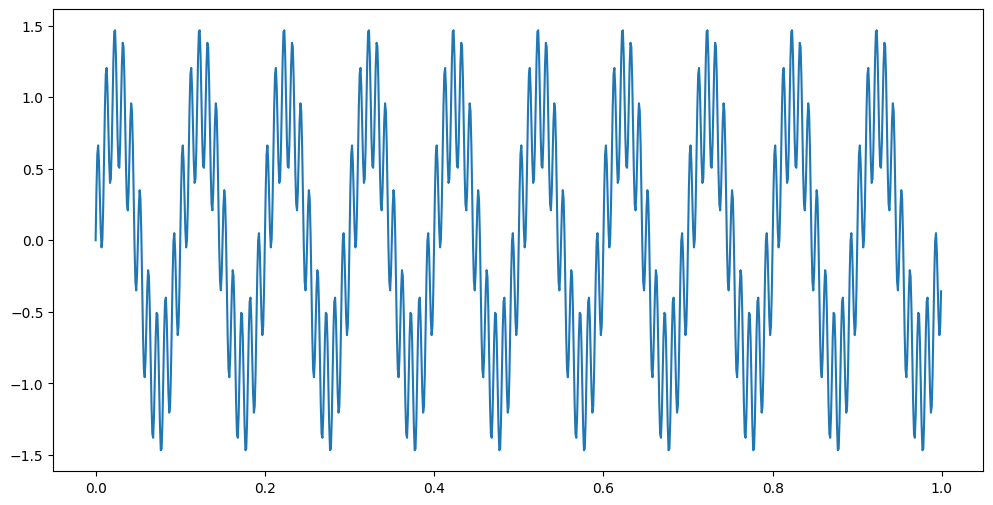

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(t, signal)
plt.show()

In [31]:
# Compute FFT of the signal
fft_signal = np.fft.fft(signal, N)
fft_freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]  # Positive frequencies only

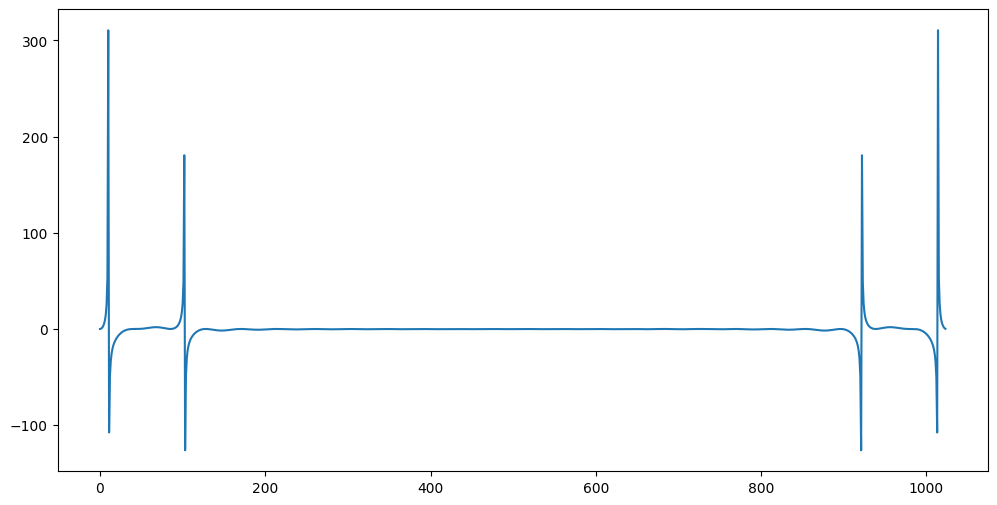

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(fft_signal)
plt.show()

In [36]:
# Compute the full frequency response for FFT size
H_full = 1 / np.sqrt(1 + (fft_freqs / fc) ** (2 * n))

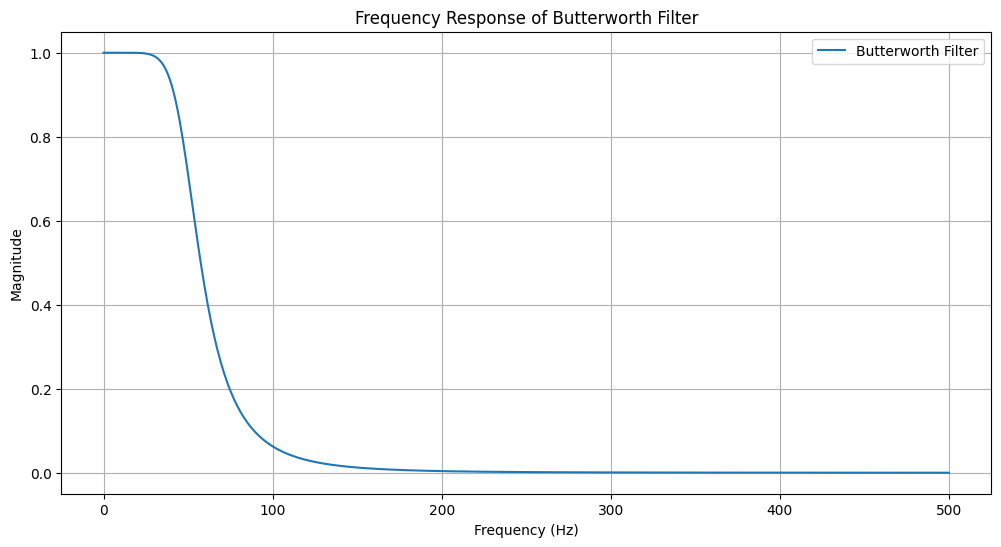

In [37]:
# 3. Plot the frequency response of the filter
plt.figure(figsize=(12, 6))
plt.plot(frequencies, H_full[:len(frequencies)], label="Butterworth Filter")
plt.title("Frequency Response of Butterworth Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

In [38]:
# Apply the filter in the frequency domain
filtered_fft = fft_signal.copy()
filtered_fft[:N//2] *= H_full  # Apply filter to positive frequencies
filtered_fft[N//2:] *= H_full[::-1]  # Apply symmetrically to negative frequencies

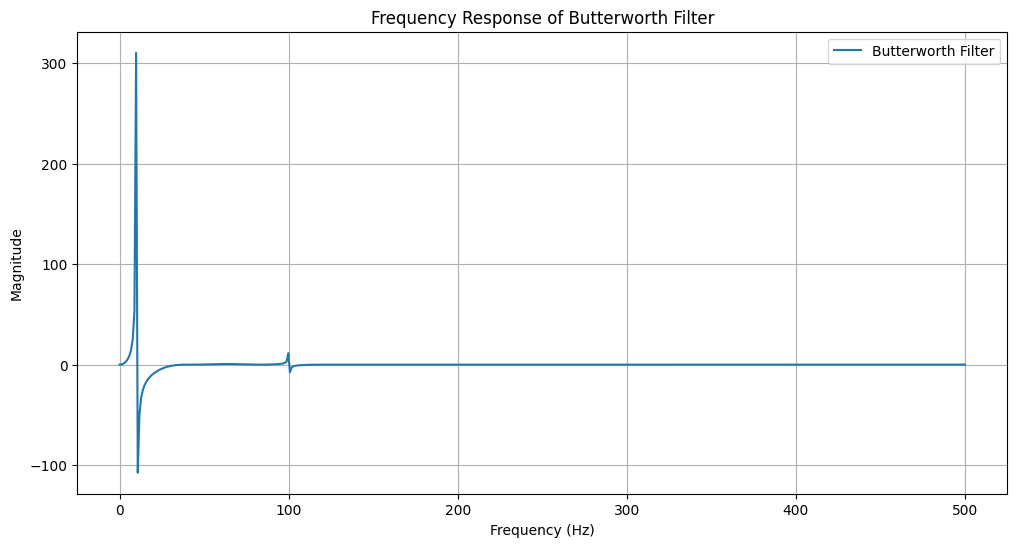

In [41]:
# 3. Plot the frequency response of the filter
plt.figure(figsize=(12, 6))
plt.plot(frequencies, filtered_fft[:len(frequencies)], label="Butterworth Filter")
plt.title("Frequency Response of Butterworth Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

In [42]:
# Perform inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft).real

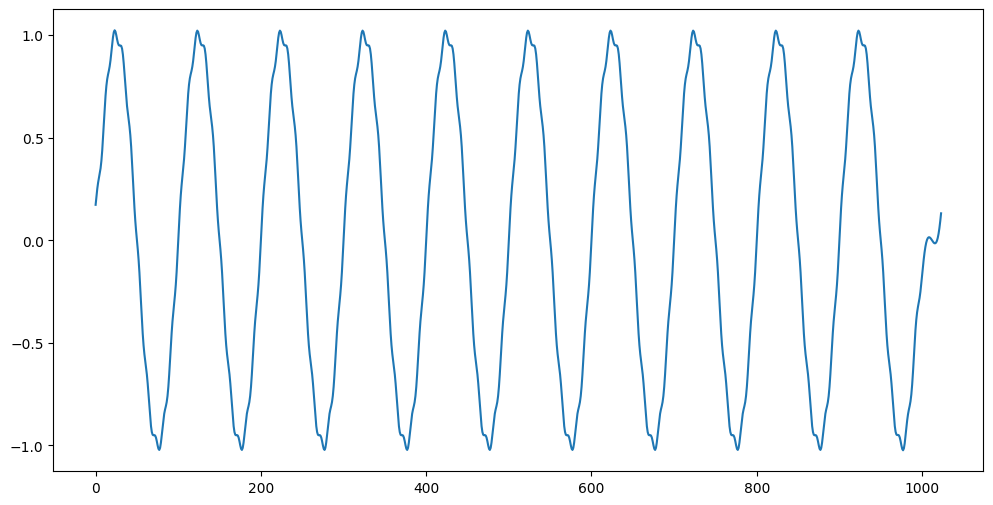

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal)
plt.show()

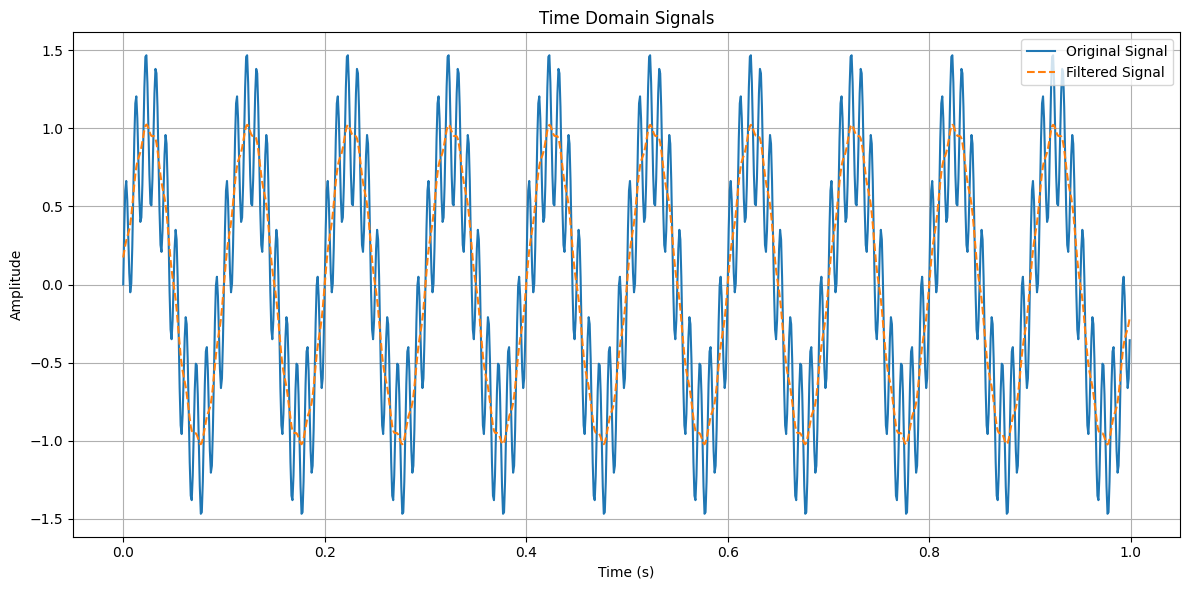

In [45]:
# 5. Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Original Signal")
plt.plot(t, filtered_signal[:fs], label="Filtered Signal", linestyle='--')
plt.title("Time Domain Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [56]:
# Generate a noisy signal
def generate_signal():
    # Clean signal: sum of two sine waves
    t = np.linspace(0, 1, 500)  # Time vector
    clean_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)
    
    # Add random noise
    noise = np.random.normal(0, 0.5, len(t))
    noisy_signal = clean_signal + noise
    
    return t, clean_signal, noisy_signal

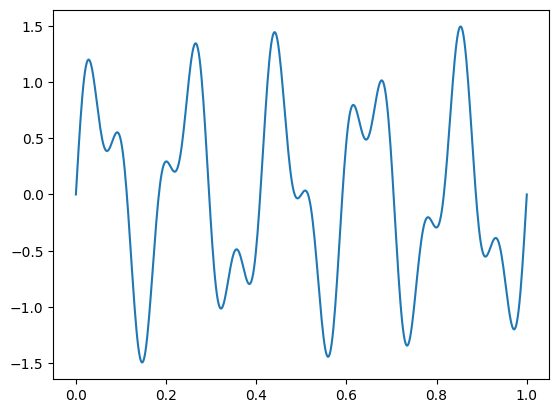

In [57]:
t, clean_signal, noisy_signal = generate_signal()
plt.plot(t,clean_signal)
plt.show()

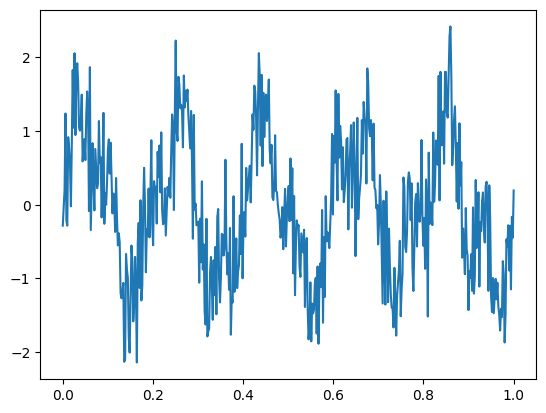

In [58]:
plt.plot(t,noisy_signal)
plt.show()

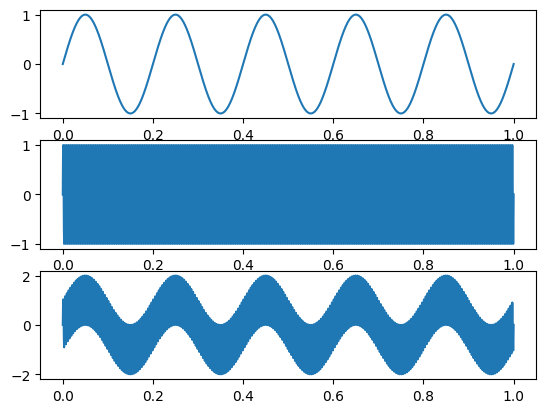

In [80]:
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh
plt.subplot(3,1,1)
plt.plot(t,xlow)
plt.subplot(3,1,2)
plt.plot(t,xhigh)
plt.subplot(3,1,3)
plt.plot(t,x)
plt.show()

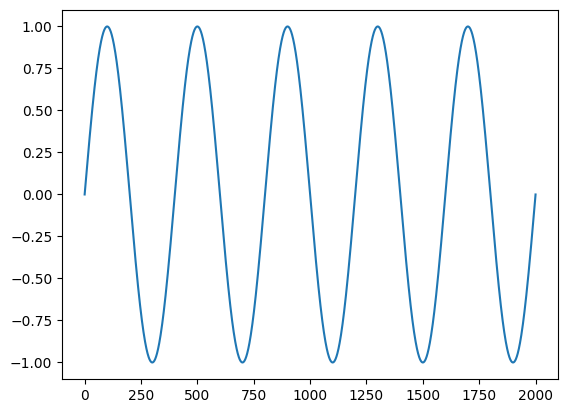

In [82]:
b, a = butter(8, 0.125)
y = filtfilt(b, a, x, padlen=150)
plt.plot(y)
plt.show()

In [83]:
np.abs(y - xlow).max()

np.float64(9.108629580020788e-06)

In [59]:
# Apply a low-pass Butterworth filter
def apply_lowpass_filter(signal, cutoff_freq, fs):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)  # 4th order Butterworth filter
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [84]:
# Objective function for PSO
def objective_function(cutoff_freq, noisy_signal, clean_signal, fs):
    denoised_signal = apply_lowpass_filter(noisy_signal, cutoff_freq, fs)
    error = np.mean((denoised_signal - clean_signal) ** 2)  # Mean squared error
    return error

In [85]:
# PSO parameters
num_particles = 20       # Number of particles in the swarm
max_iterations = 50      # Maximum number of iterations
w = 0.7                  # Inertia weight
c1 = 1.5                 # Cognitive coefficient
c2 = 1.5                 # Social coefficient
search_space = [1, 20]   # Search space for cutoff frequency (in Hz)

In [86]:
# Initialize the swarm
positions = np.random.uniform(search_space[0], search_space[1], num_particles)
velocities = np.random.uniform(-1, 1, num_particles)

In [87]:
# Generate the noisy signal
t, clean_signal, noisy_signal = generate_signal()
fs = 500  # Sampling frequency (Hz)

In [88]:
# Initialize personal best positions and fitness values
p_best_positions = positions.copy()
p_best_fitness = np.array([objective_function(x, noisy_signal, clean_signal, fs) for x in positions])

In [89]:
# Initialize global best position and fitness value
g_best_position = p_best_positions[np.argmin(p_best_fitness)]
g_best_fitness = np.min(p_best_fitness)

In [90]:
# PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (p_best_positions[i] - positions[i]) +
                         c2 * r2 * (g_best_position - positions[i]))
        
        # Update position
        positions[i] += velocities[i]
        
        # Ensure the position stays within the search space
        positions[i] = np.clip(positions[i], search_space[0], search_space[1])
        
        # Evaluate fitness
        fitness = objective_function(positions[i], noisy_signal, clean_signal, fs)
        
        # Update personal best
        if fitness < p_best_fitness[i]:
            p_best_fitness[i] = fitness
            p_best_positions[i] = positions[i]
        
        # Update global best
        if fitness < g_best_fitness:
            g_best_fitness = fitness
            g_best_position = positions[i]
             # Print progress
    print(f"Iteration {iteration + 1}: Best Cutoff Frequency = {g_best_position:.2f} Hz, Best Fitness = {g_best_fitness:.6f}")


Iteration 1: Best Cutoff Frequency = 16.45 Hz, Best Fitness = 0.015666
Iteration 2: Best Cutoff Frequency = 16.53 Hz, Best Fitness = 0.015653
Iteration 3: Best Cutoff Frequency = 16.94 Hz, Best Fitness = 0.015639
Iteration 4: Best Cutoff Frequency = 16.88 Hz, Best Fitness = 0.015637
Iteration 5: Best Cutoff Frequency = 16.83 Hz, Best Fitness = 0.015636
Iteration 6: Best Cutoff Frequency = 16.83 Hz, Best Fitness = 0.015636
Iteration 7: Best Cutoff Frequency = 16.83 Hz, Best Fitness = 0.015636
Iteration 8: Best Cutoff Frequency = 16.83 Hz, Best Fitness = 0.015636
Iteration 9: Best Cutoff Frequency = 16.79 Hz, Best Fitness = 0.015635
Iteration 10: Best Cutoff Frequency = 16.79 Hz, Best Fitness = 0.015635
Iteration 11: Best Cutoff Frequency = 16.79 Hz, Best Fitness = 0.015635
Iteration 12: Best Cutoff Frequency = 16.81 Hz, Best Fitness = 0.015635
Iteration 13: Best Cutoff Frequency = 16.81 Hz, Best Fitness = 0.015635
Iteration 14: Best Cutoff Frequency = 16.81 Hz, Best Fitness = 0.015635
I

In [67]:
# Output the result
print("\nOptimization Complete:")
print(f"Optimal Cutoff Frequency: {g_best_position:.2f} Hz")


Optimization Complete:
Optimal Cutoff Frequency: 15.09 Hz


In [68]:
# Apply the optimal filter to the noisy signal
optimal_denoised_signal = apply_lowpass_filter(noisy_signal, g_best_position, fs)


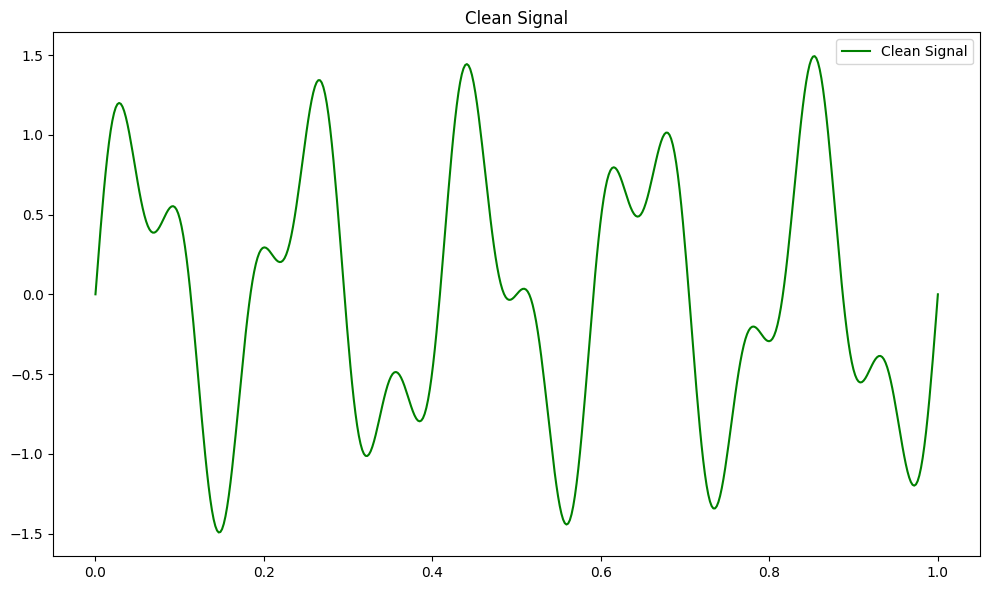

In [69]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label="Clean Signal", color="green")
plt.title("Clean Signal")
plt.legend()
plt.tight_layout()
plt.show()

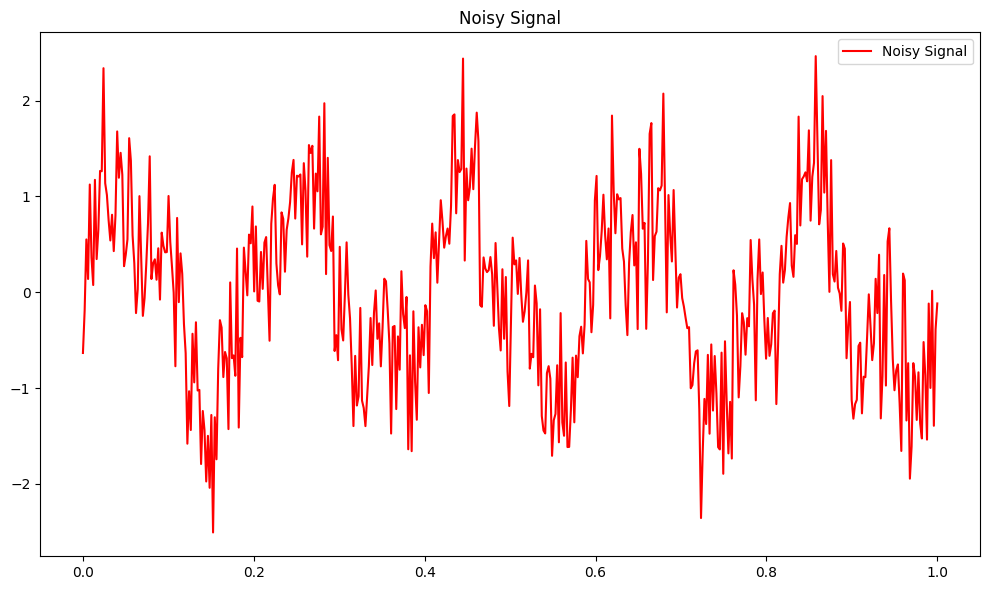

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", color="red")
plt.title("Noisy Signal")
plt.legend()
plt.tight_layout()
plt.show()

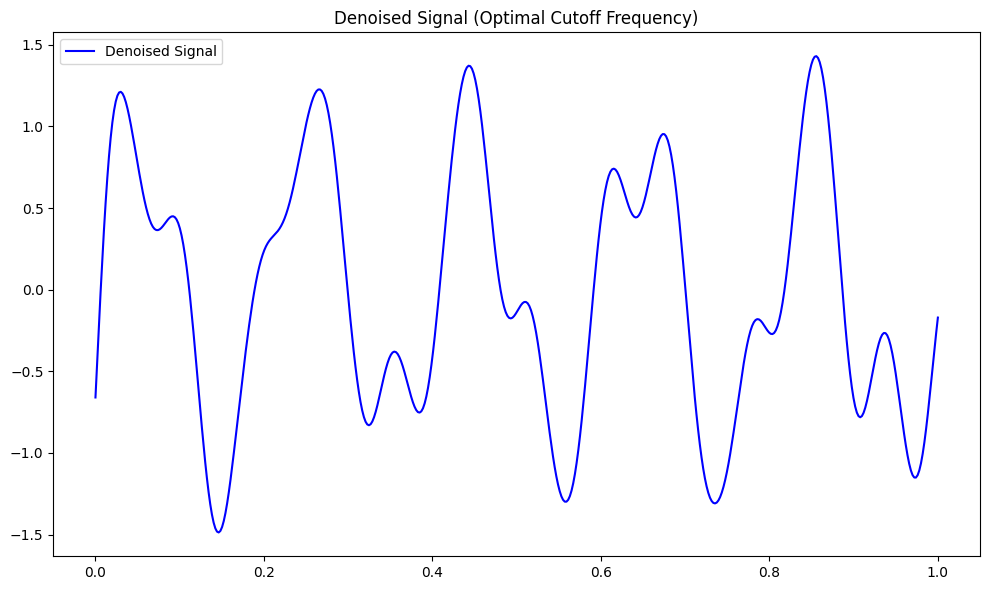

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(t, optimal_denoised_signal, label="Denoised Signal", color="blue")
plt.title("Denoised Signal (Optimal Cutoff Frequency)")
plt.legend()
plt.tight_layout()
plt.show()